<h1> MV LAB ASSIGNMENT 4 </h1>

Madhuri Santhosh Srinivasan
<br>
21BAI1892

<center>

[LINK TO GITHUB REPOSITORY](https://github.com/madhurisanthoshs/Machine-Vision-Lab/blob/main/MV_AS_4.ipynb) 

</center>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

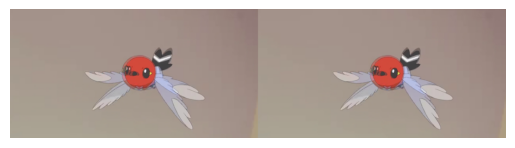

End of video.


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

video_path = r"C:\Users\santh\Videos\birb.mp4"
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error opening video file.")
else:
    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    print(f"Video FPS: {fps}, Width: {width}, Height: {height}")

    print('inline video with contours marked: ')

    ret, prev_frame = cap.read()
    if not ret:
        print("End of video.")
        exit()
    prev_frame_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)

    while True:
        ret, frame = cap.read()
        if not ret:
            print("End of video.")
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frame_diff = cv2.absdiff(gray, prev_frame_gray)
        _, thresh = cv2.threshold(frame_diff, 25, 255, cv2.THRESH_BINARY)
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        for contour in contours:
            if cv2.contourArea(contour) > 100:
                (x, y, w, h) = cv2.boundingRect(contour)
                cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

        scale_percent = 50
        width_resized = int(frame.shape[1] * scale_percent / 100)
        height_resized = int(frame.shape[0] * scale_percent / 100)
        dim = (width_resized, height_resized)
        resized_frame = cv2.resize(frame, dim, interpolation=cv2.INTER_AREA)

        dim_original = (int(frame.shape[1] * height_resized / frame.shape[0]), height_resized)
        resized_original = cv2.resize(frame, dim_original, interpolation=cv2.INTER_AREA)
        
        horizontal_concat = np.concatenate((resized_original, resized_frame), axis=1)
        horizontal_concat = cv2.cvtColor(horizontal_concat, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for display

        # Clear output and display the frame
        clear_output(wait=True)
        plt.imshow(horizontal_concat)
        plt.axis('off')
        plt.show()

        prev_frame_gray = gray
        if cv2.waitKey(30) & 0xFF == ord('q'):
            break

    cap.release()


In [8]:
import io
import PIL
import cv2

Video FPS: 30.0, Width: 1258, Height: 654


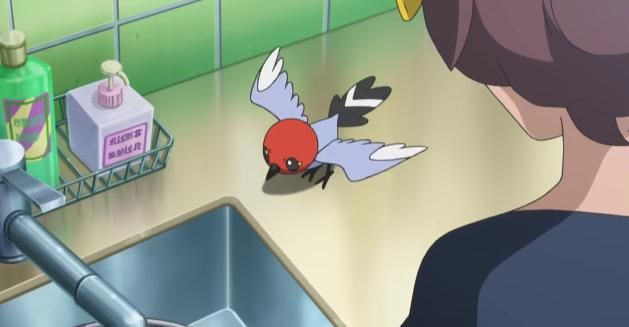

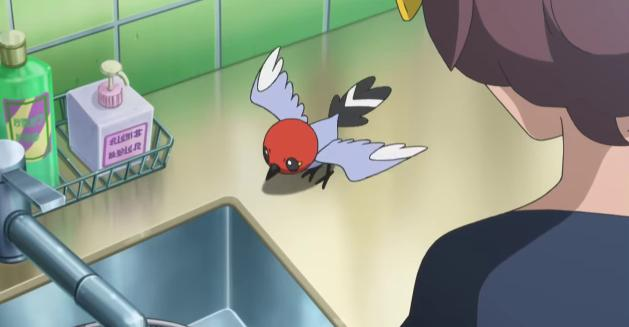

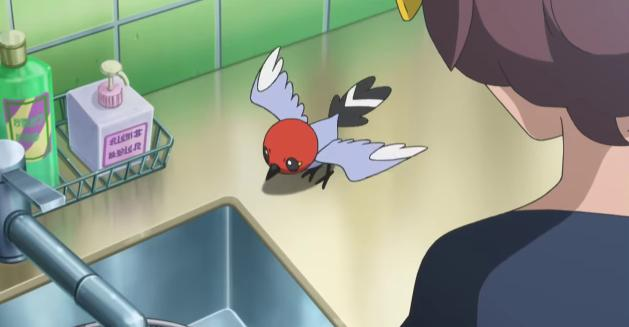

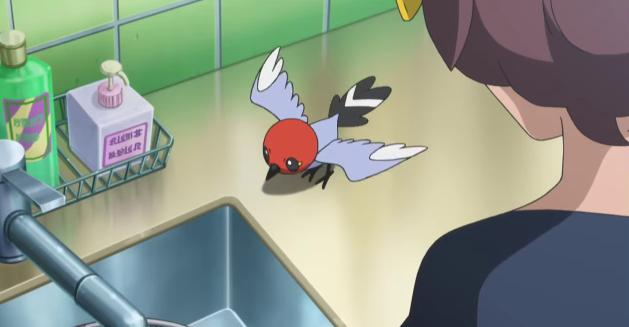

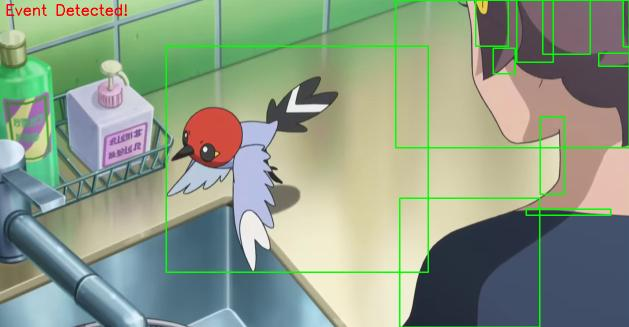

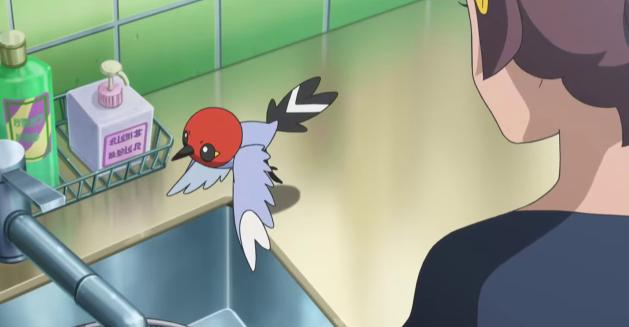

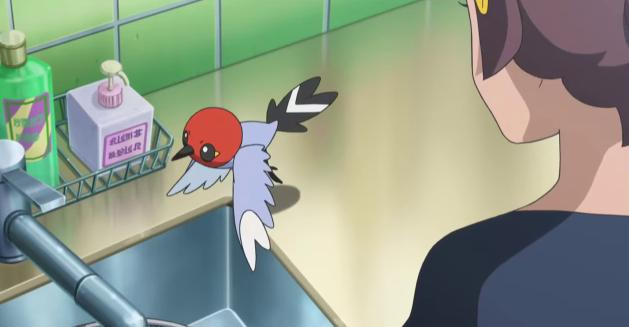

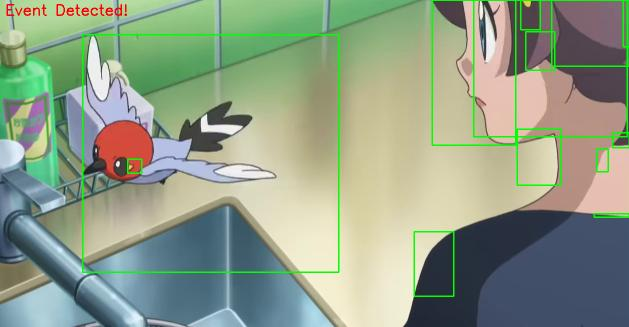

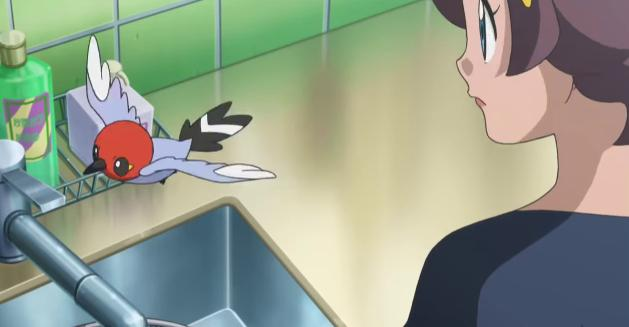

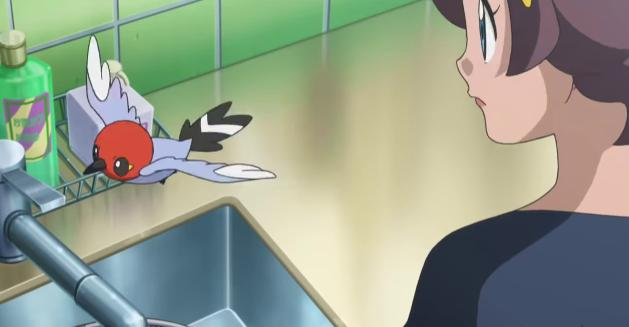

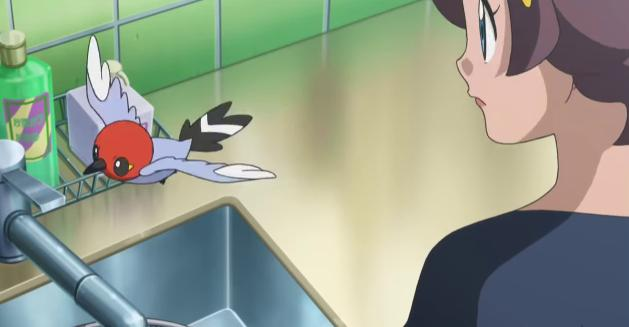

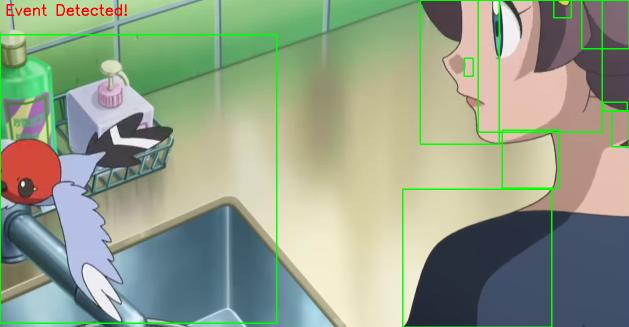

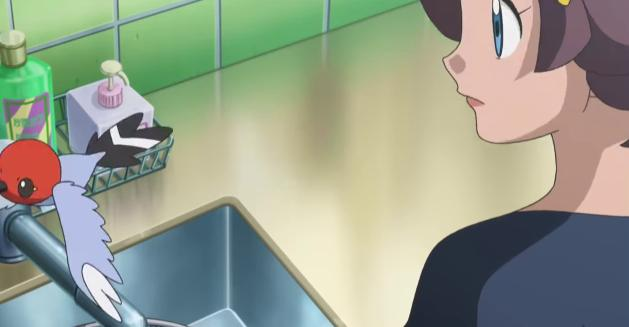

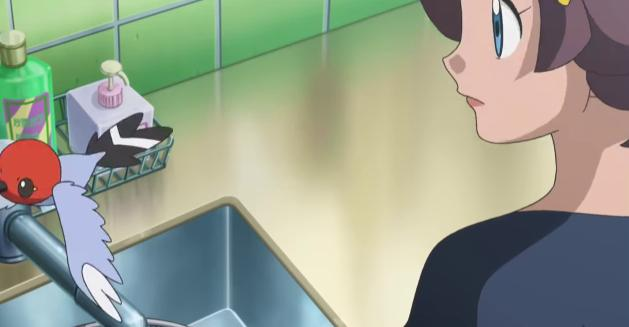

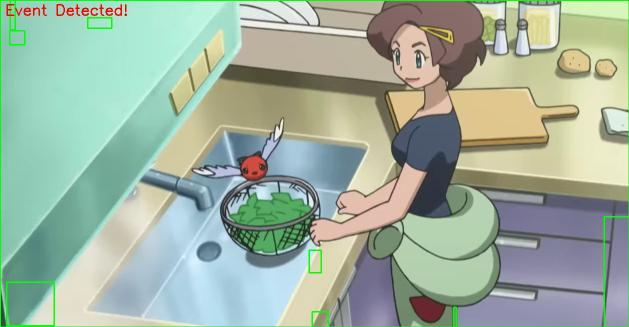

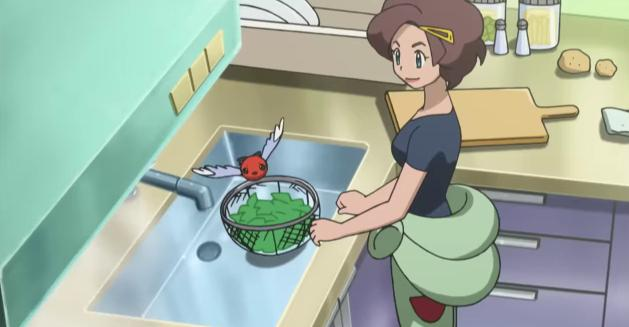

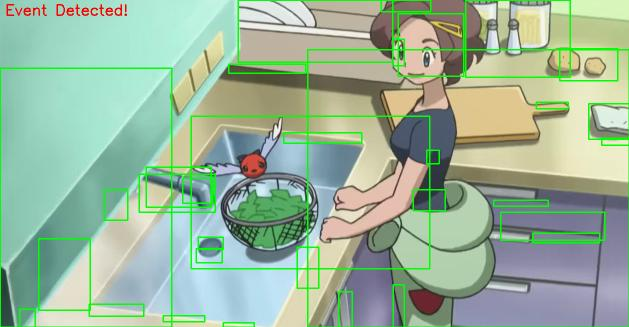

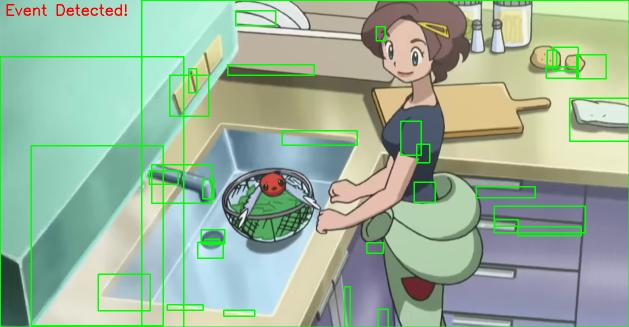

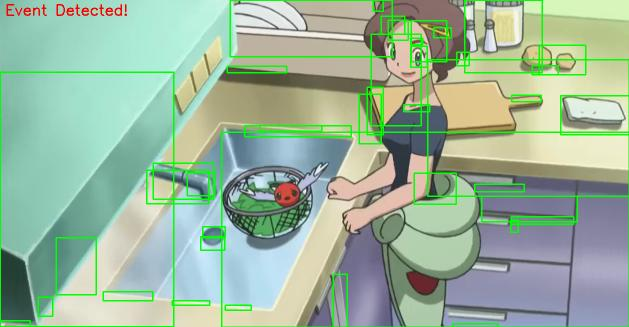

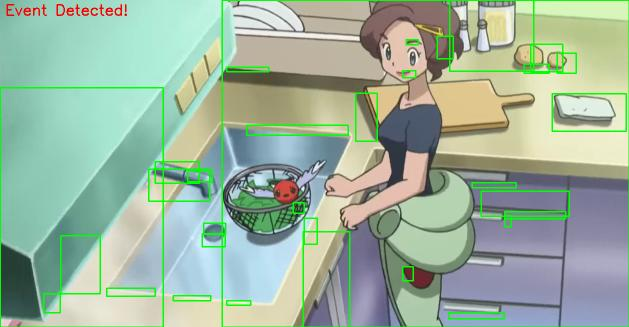

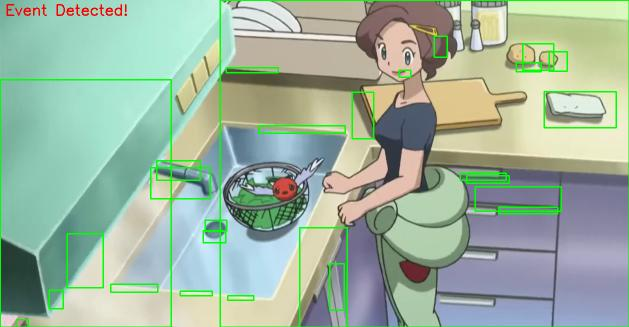

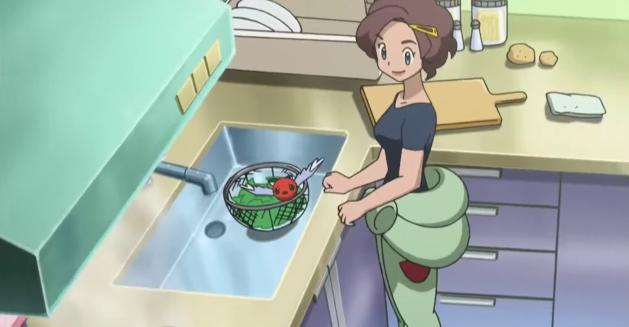

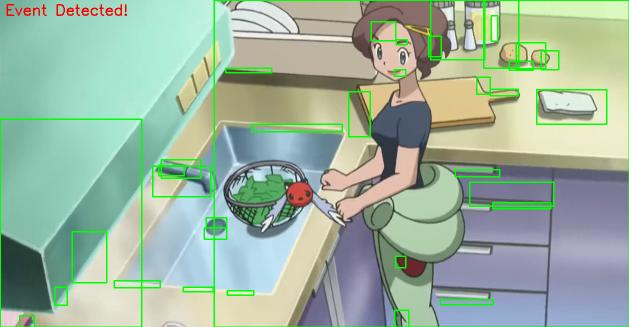

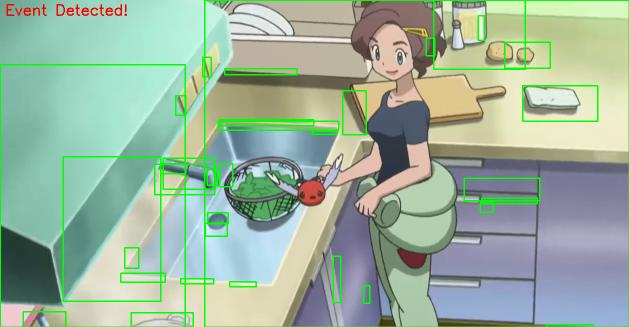

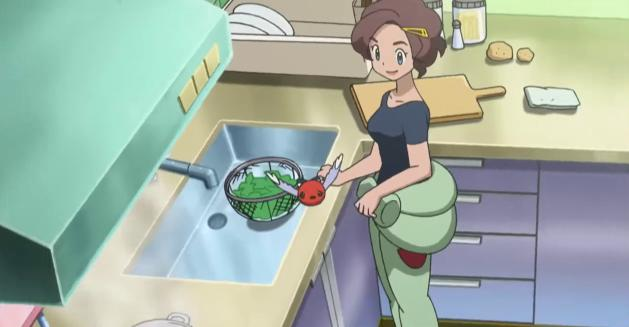

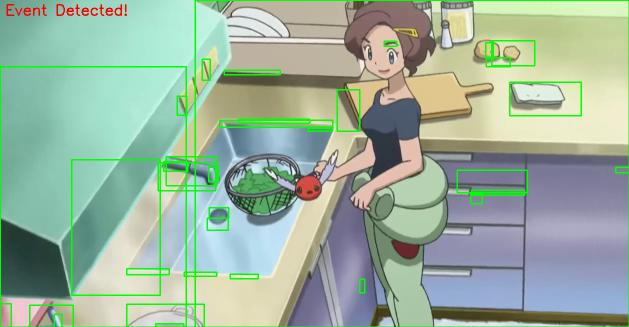

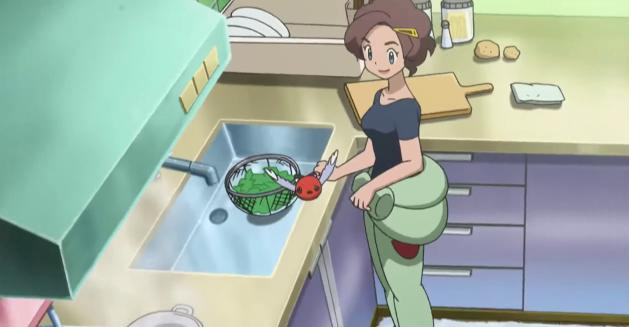

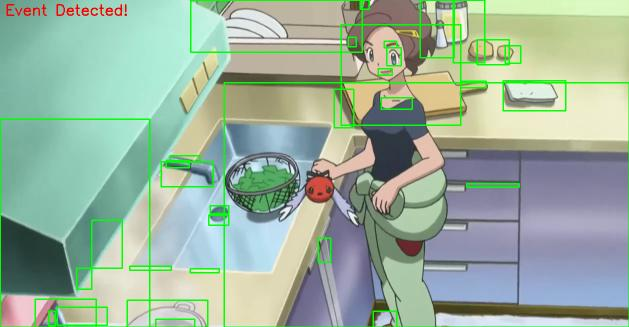

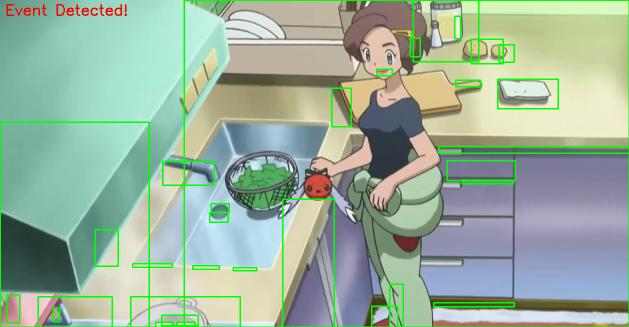

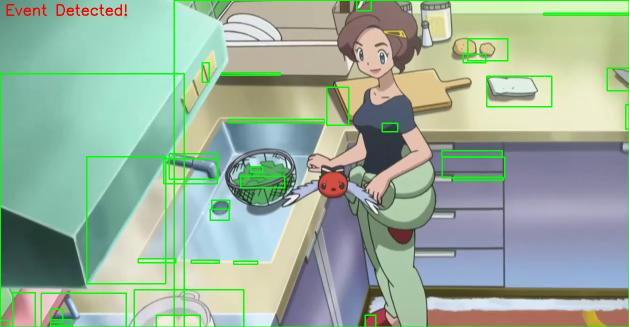

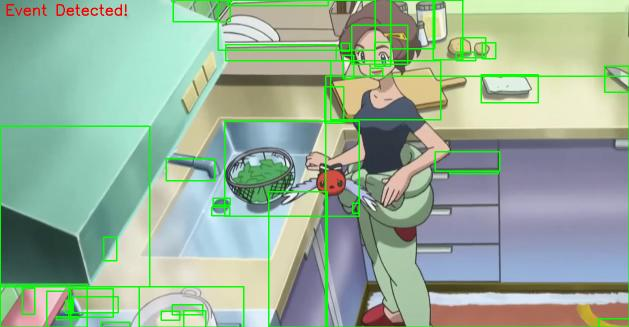

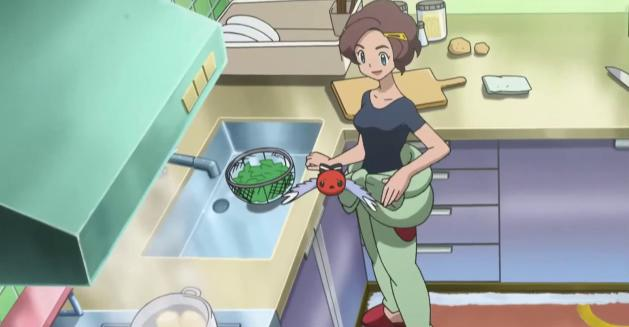

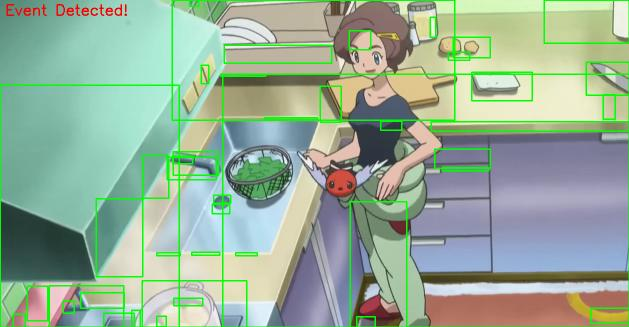

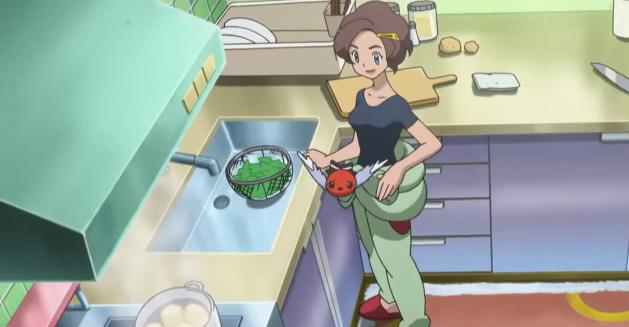

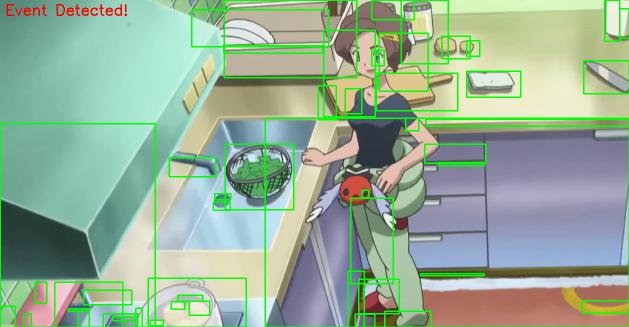

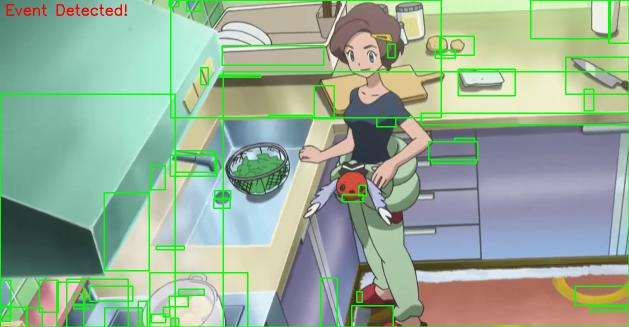

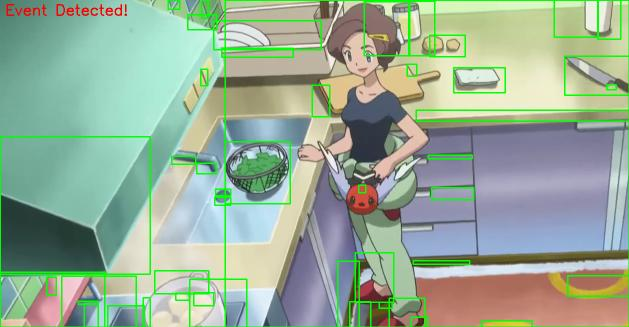

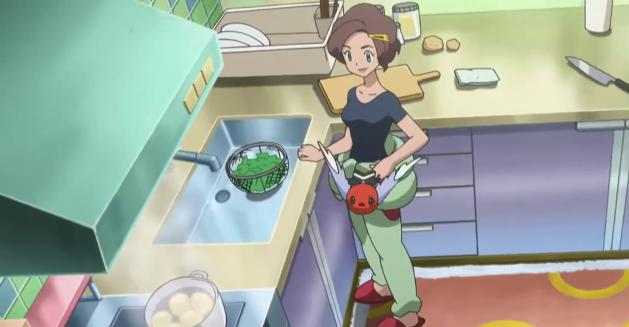

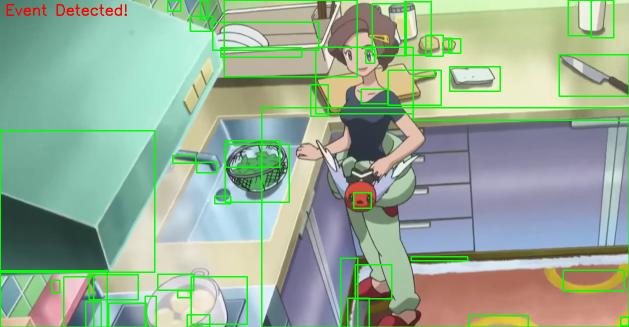

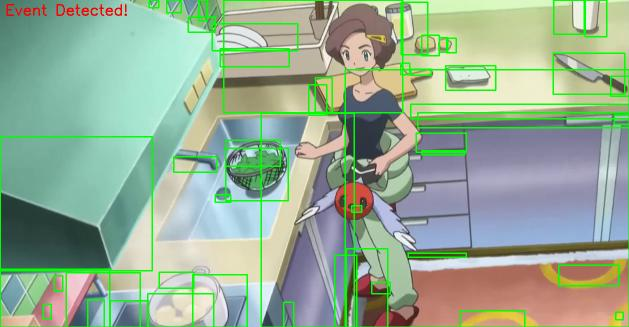

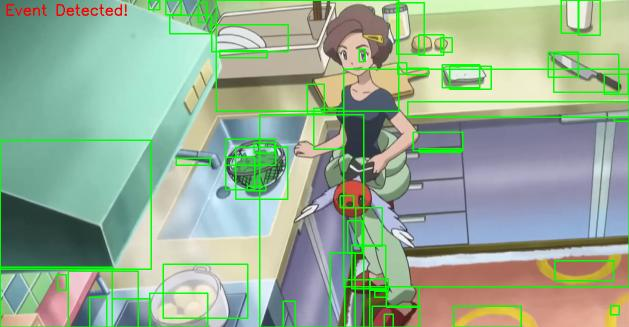

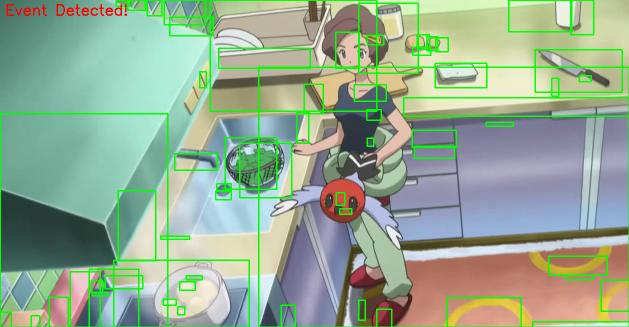

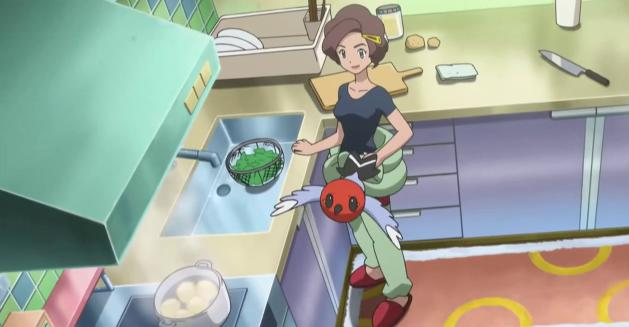

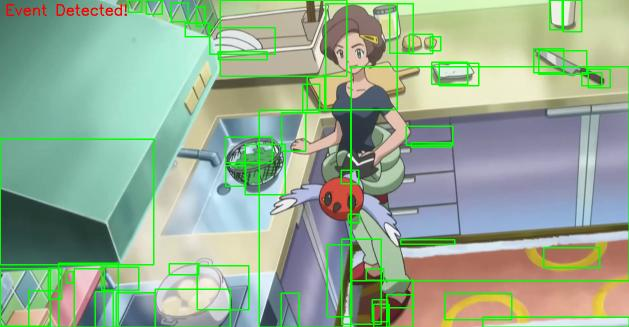

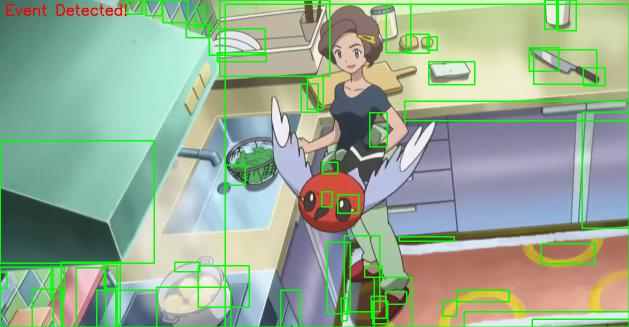

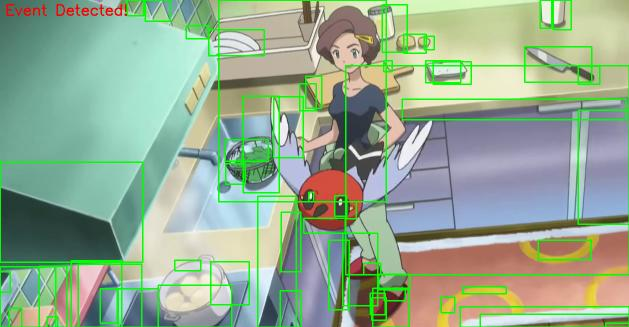

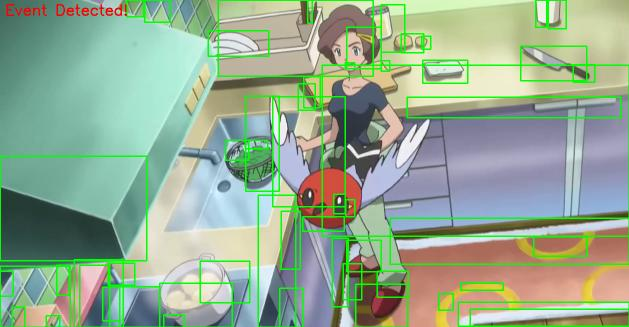

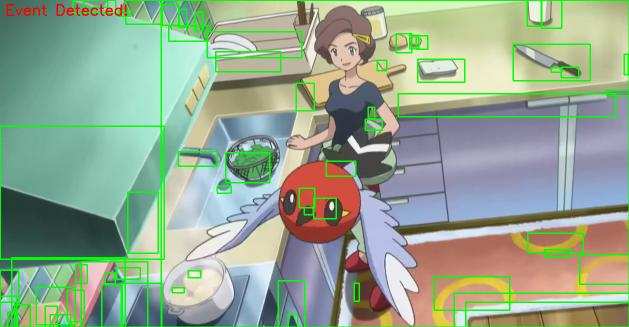

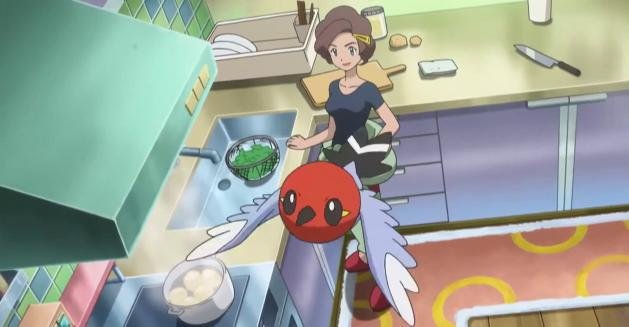

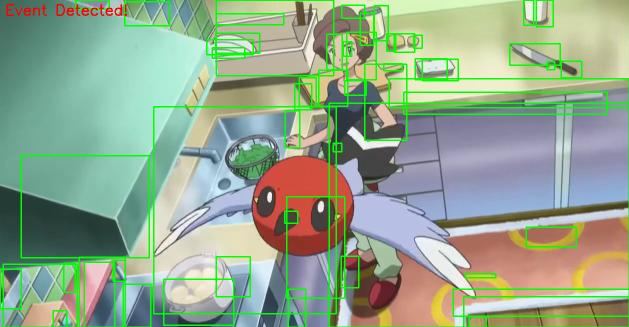

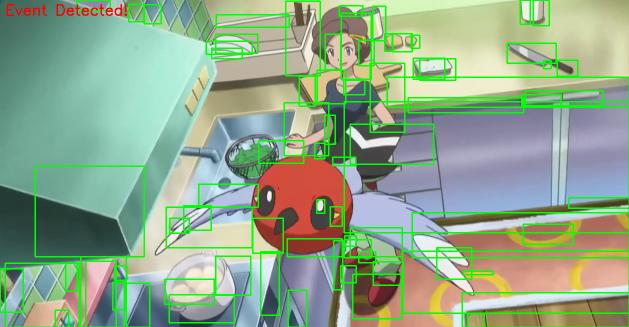

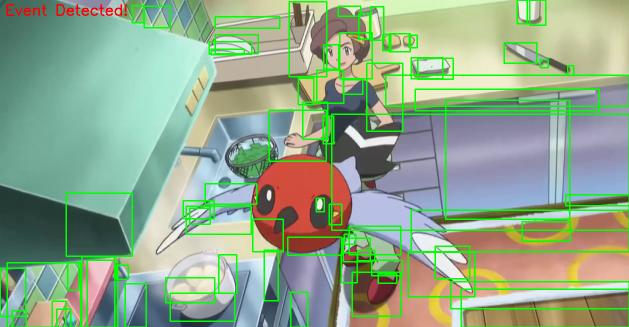

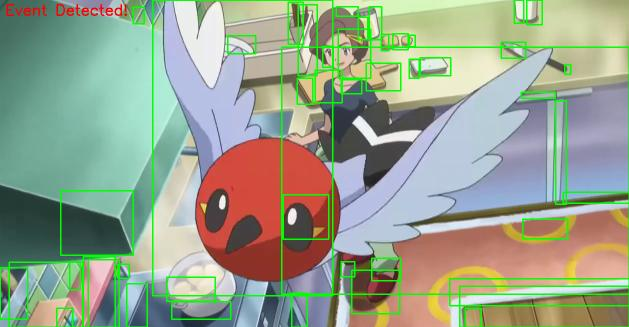

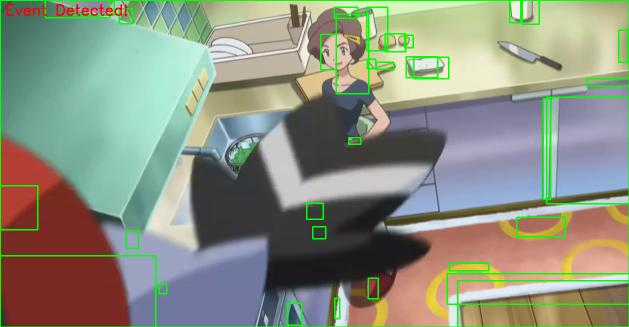

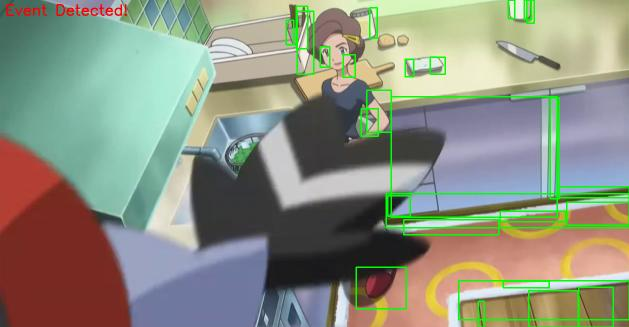

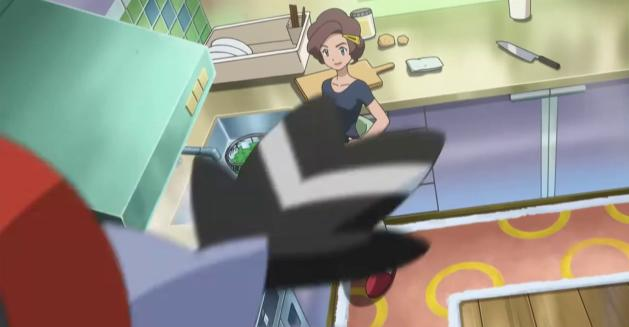

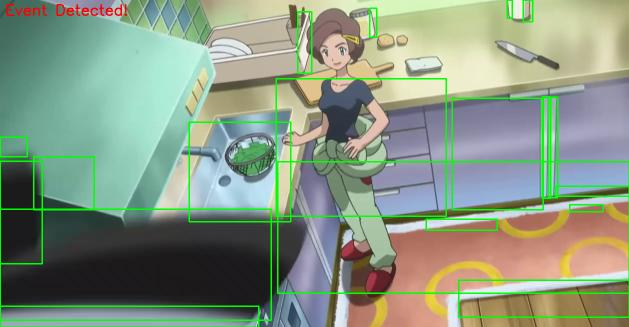

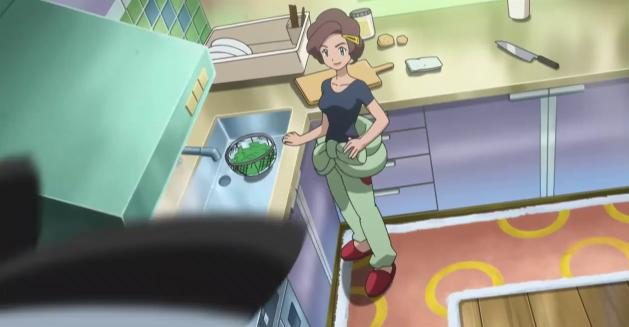

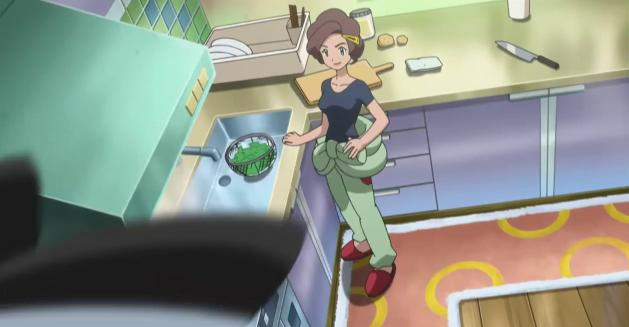

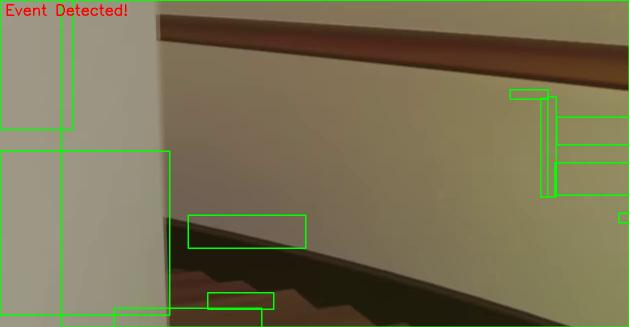

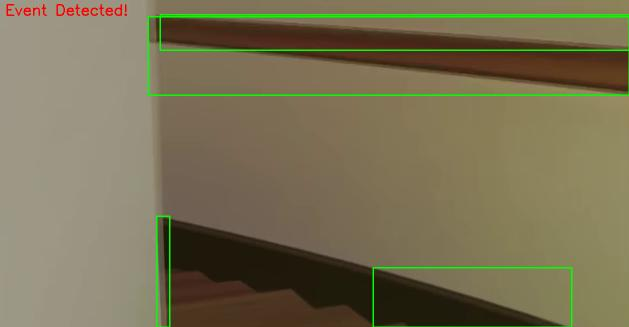

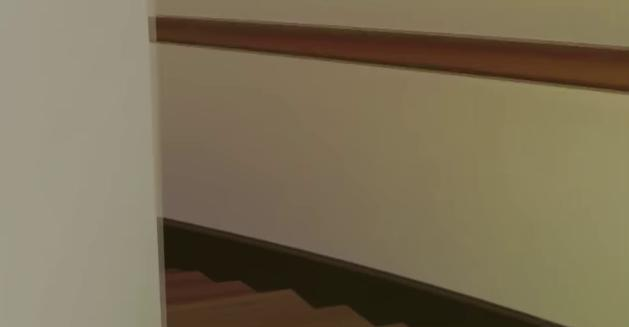

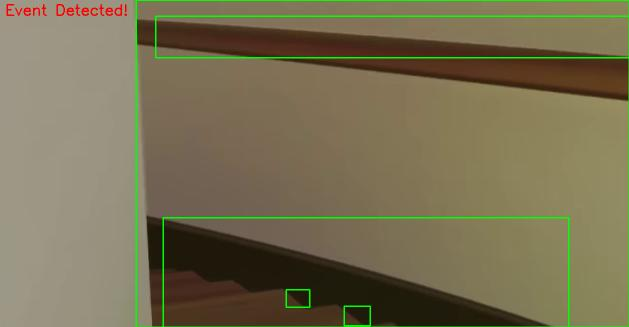

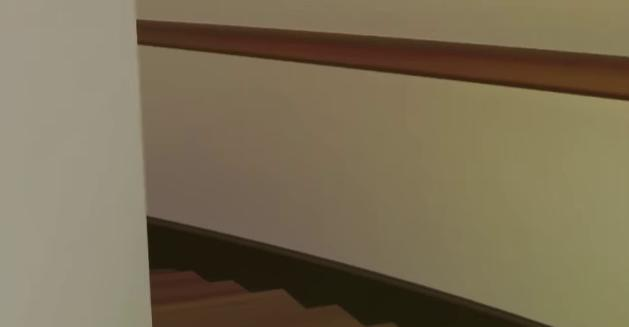

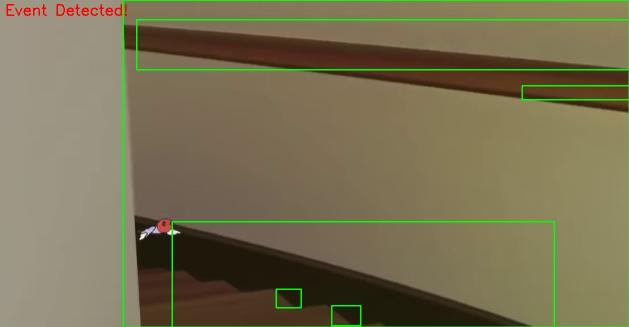

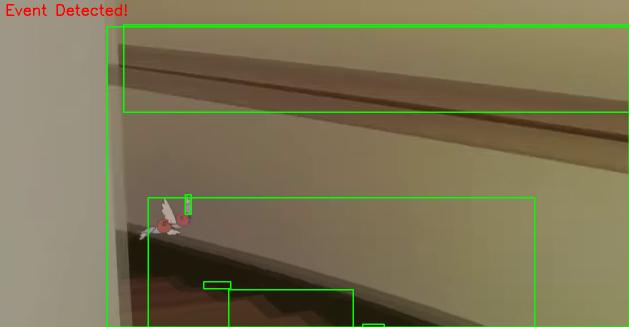

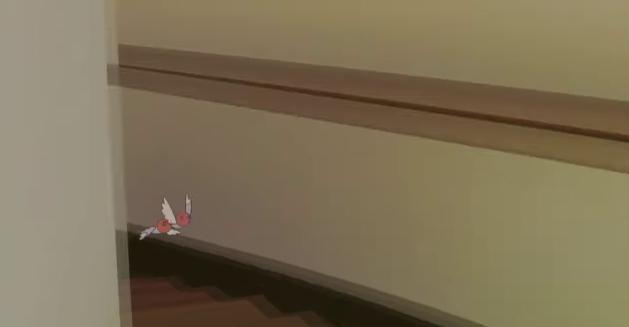

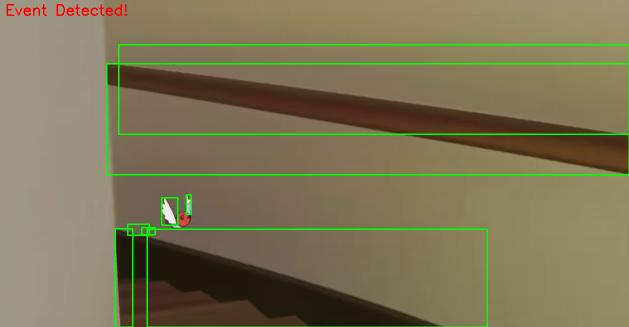

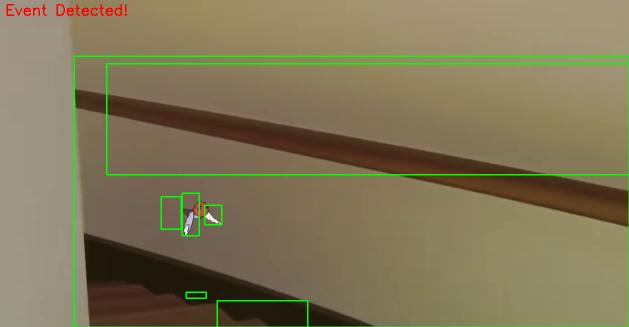

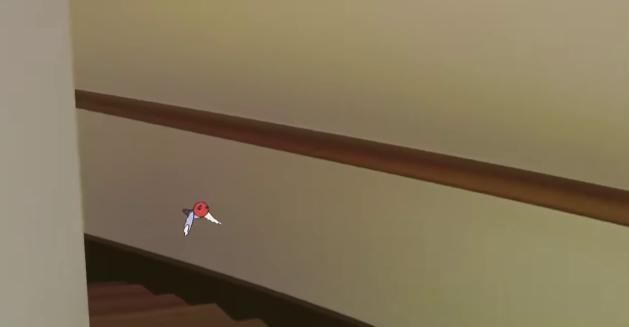

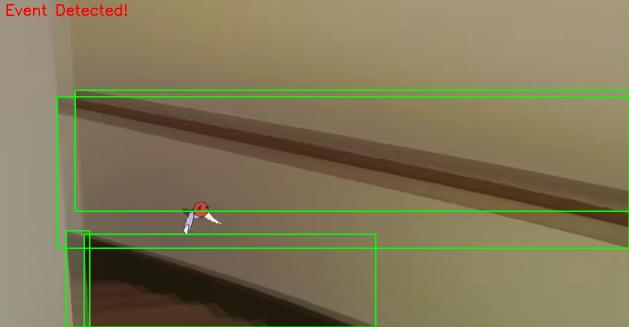

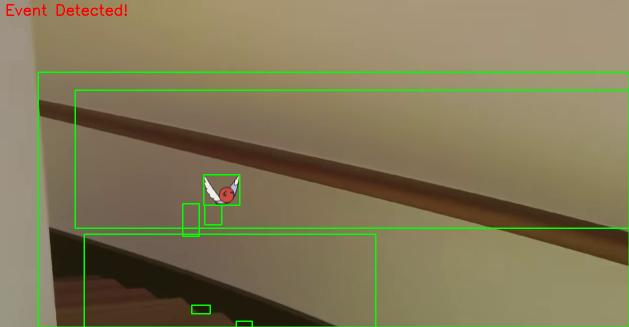

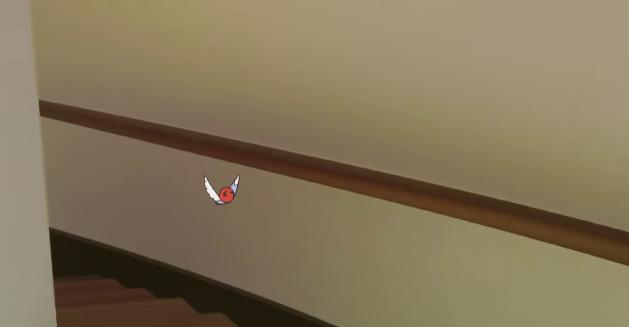

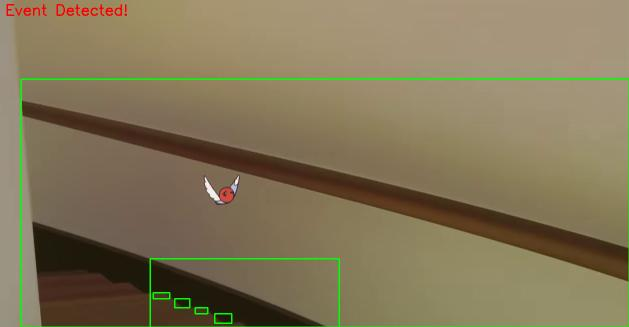

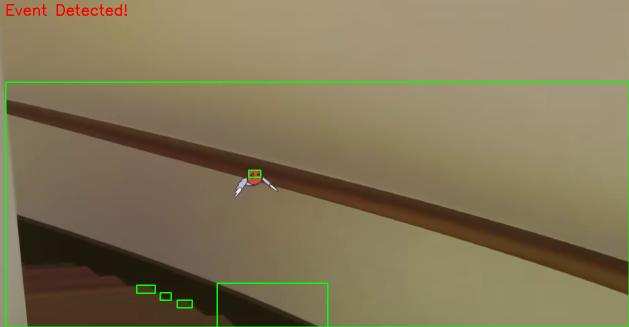

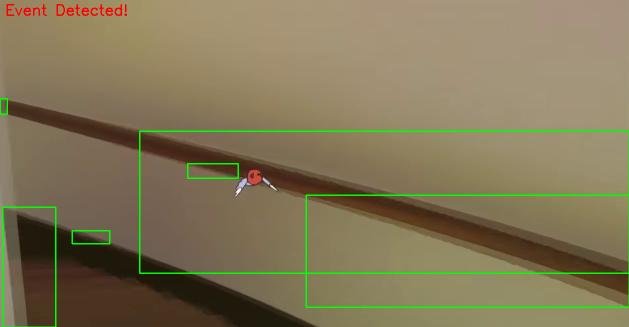

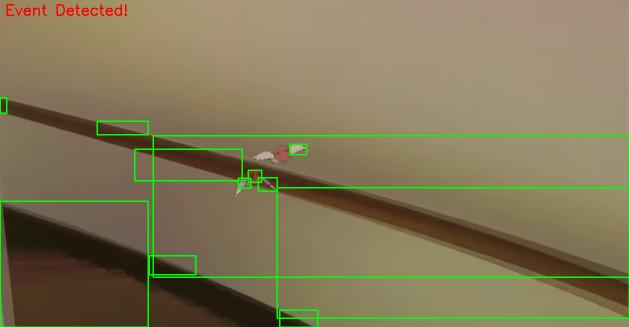

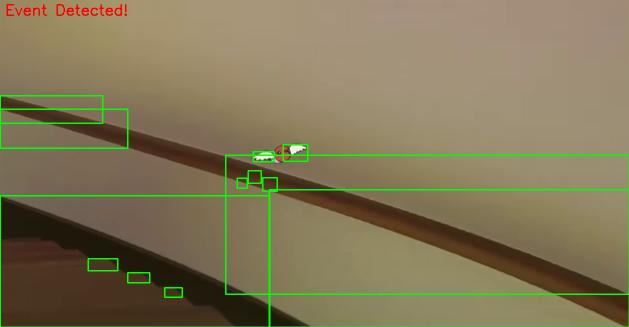

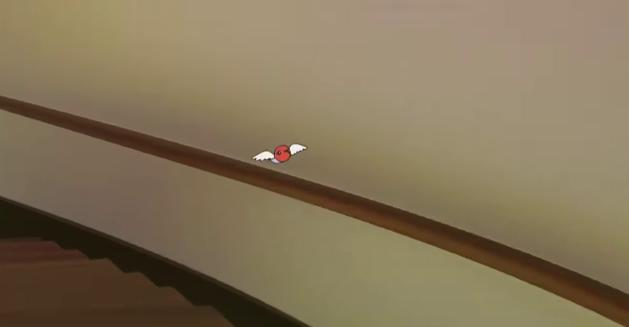

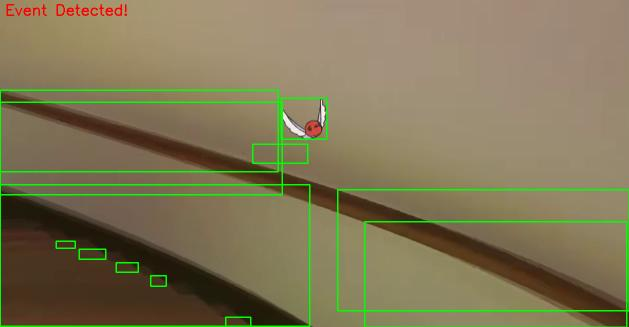

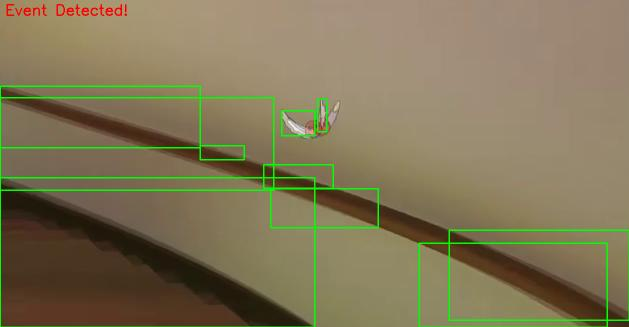

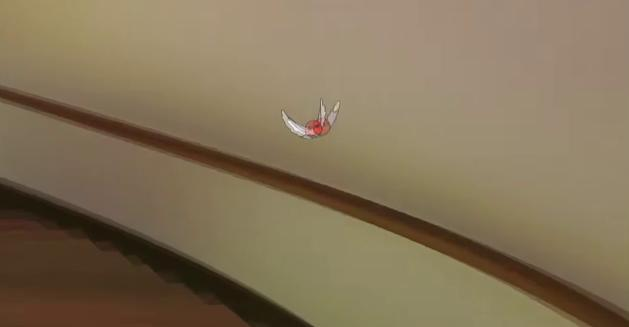

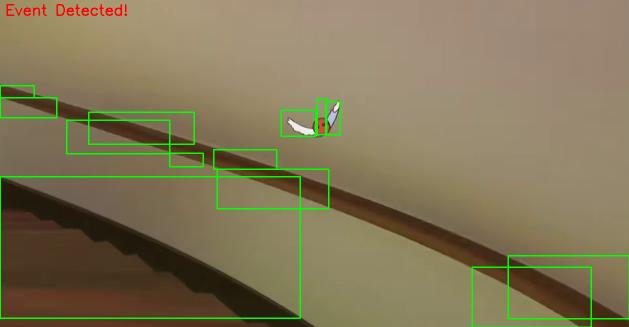

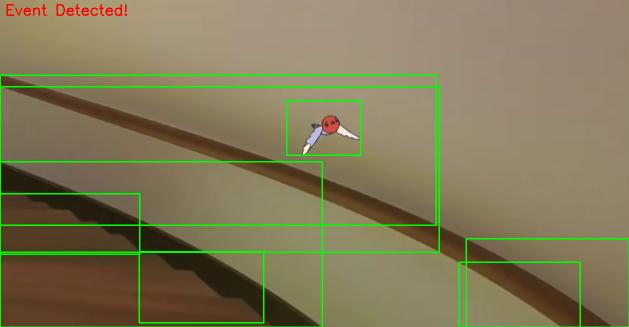

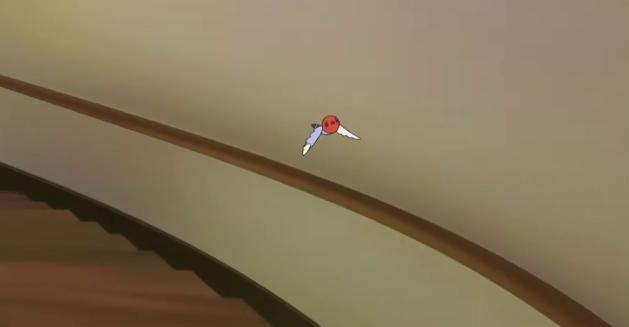

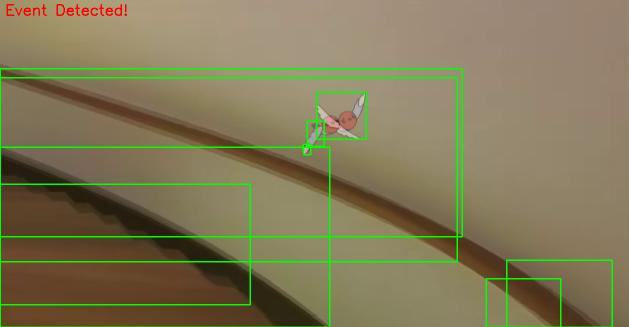

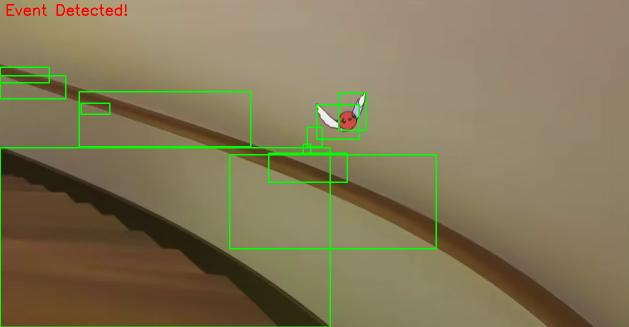

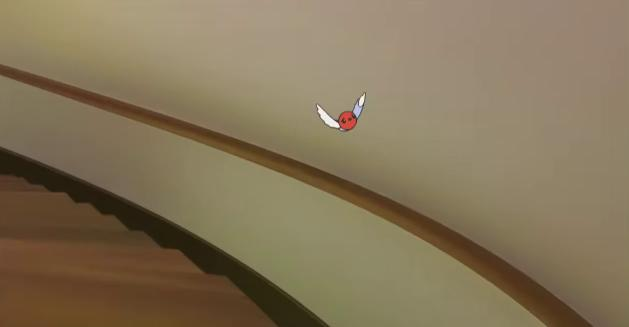

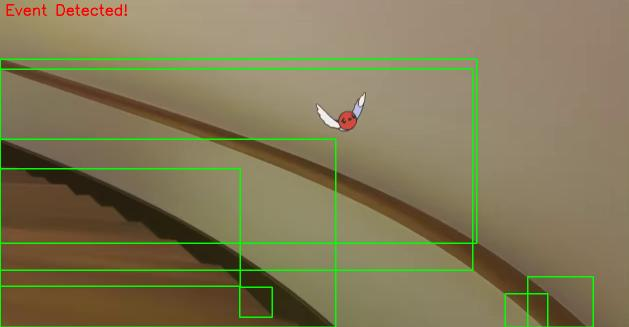

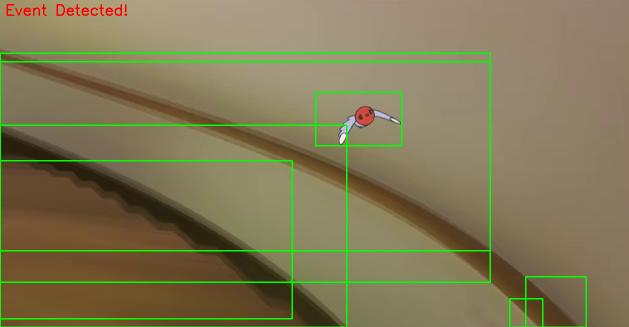

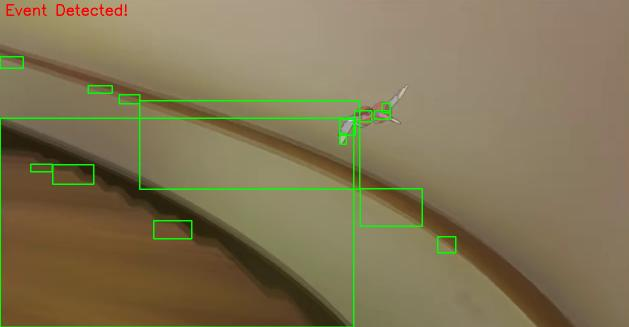

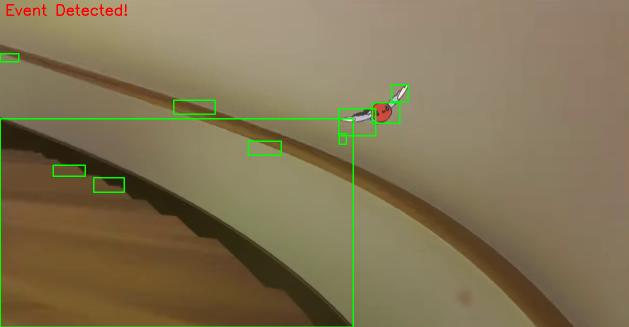

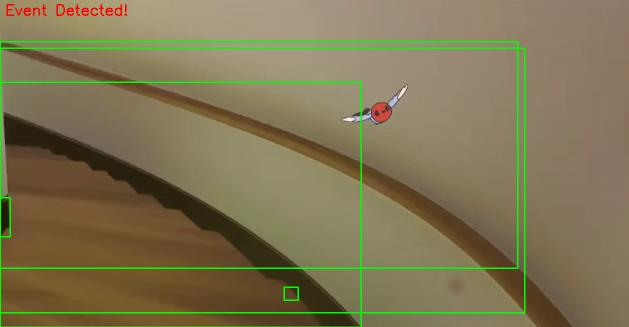

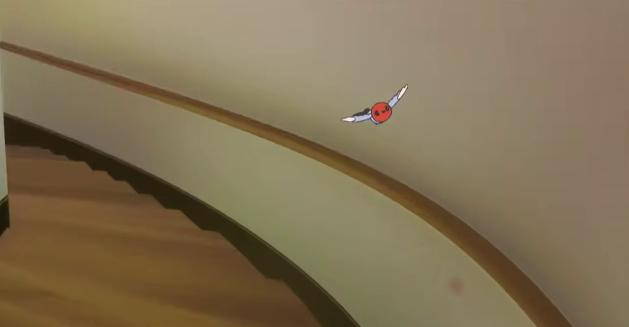

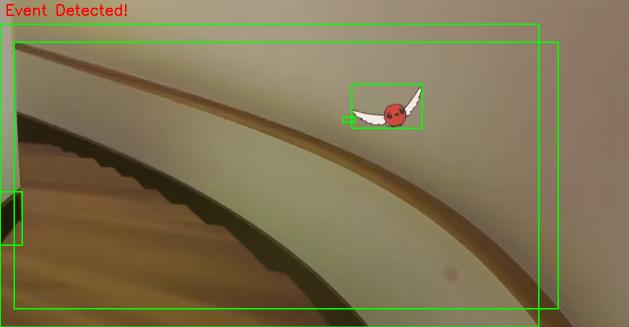

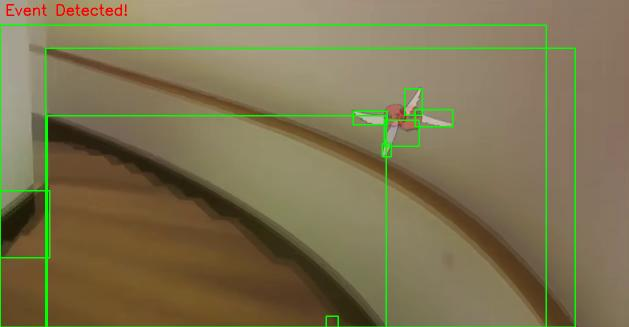

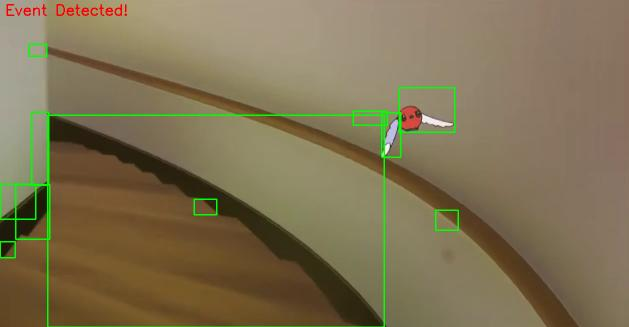

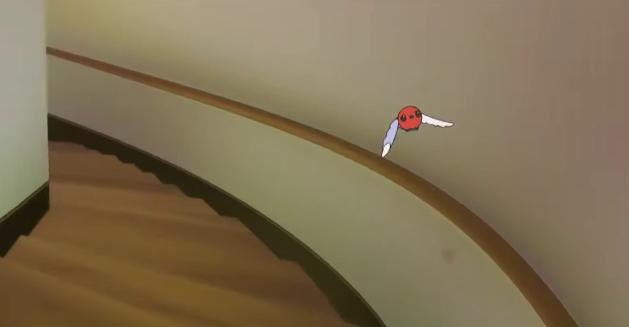

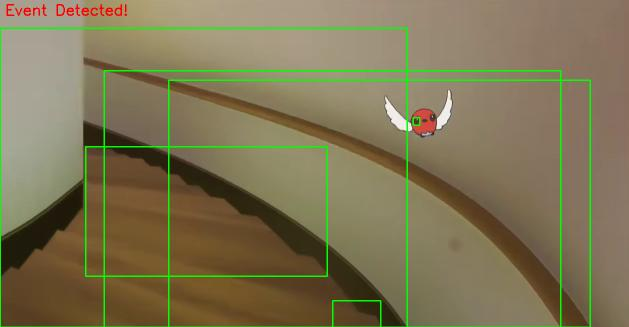

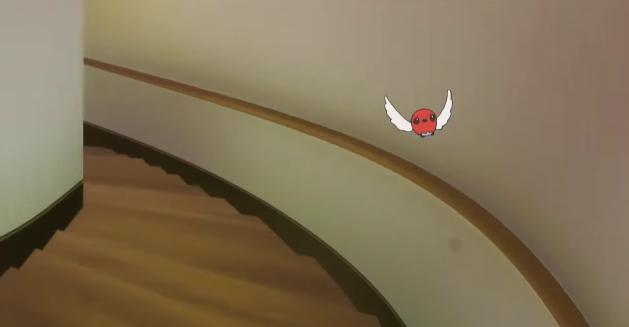

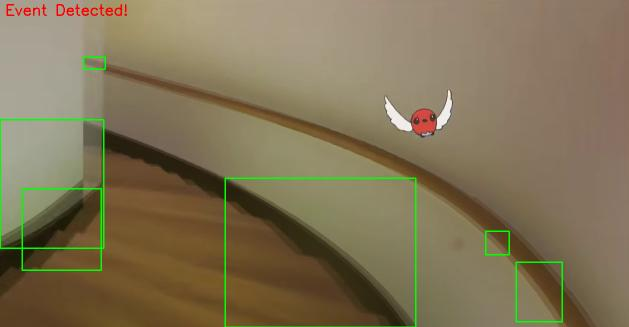

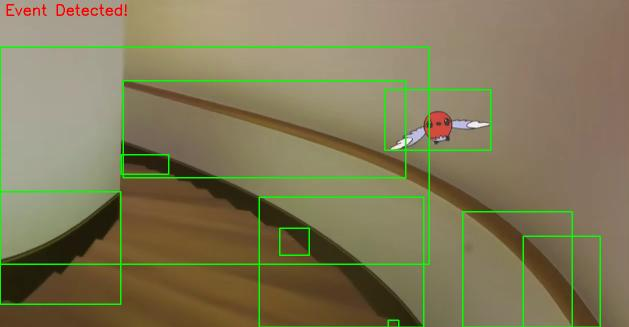

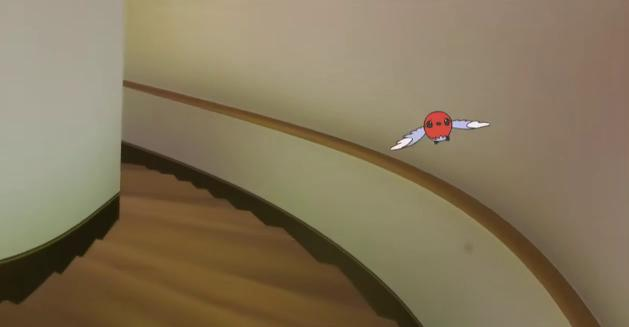

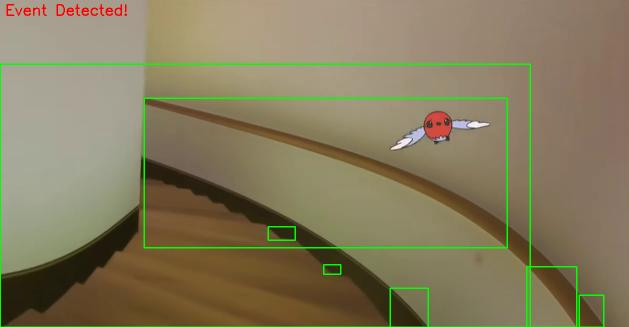

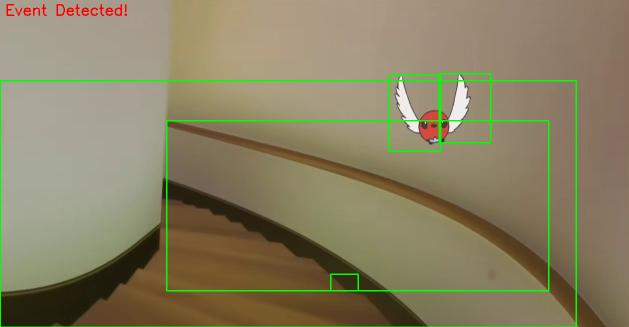

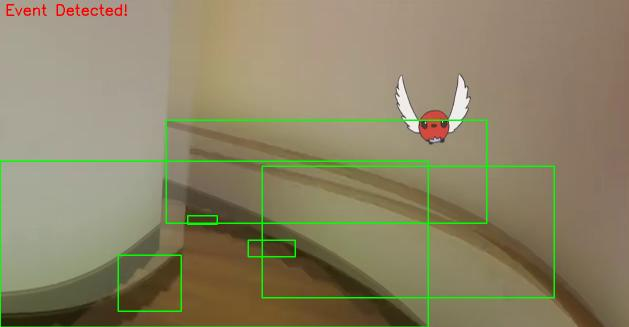

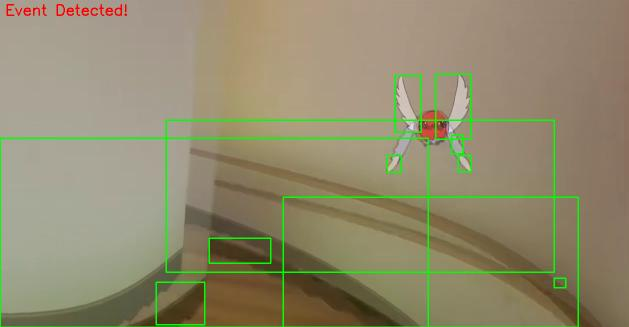

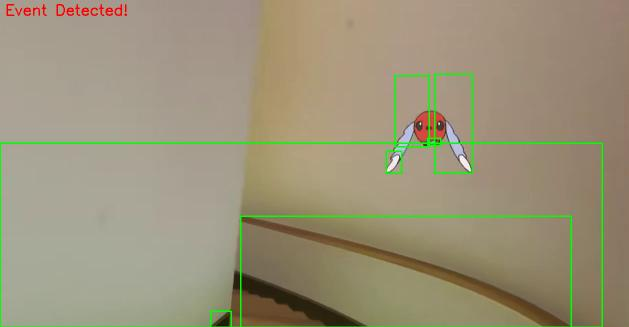

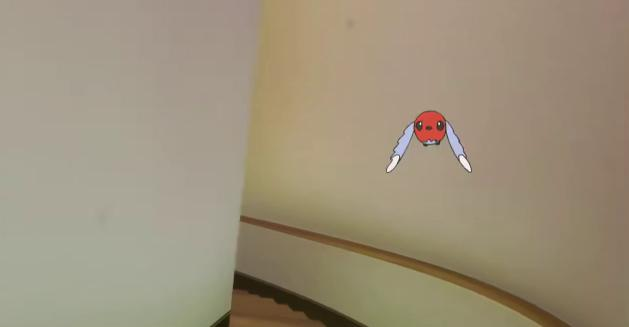

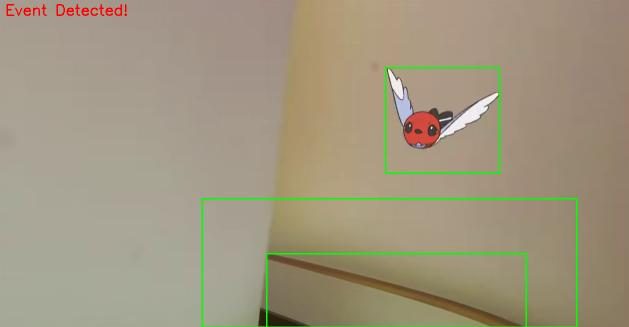

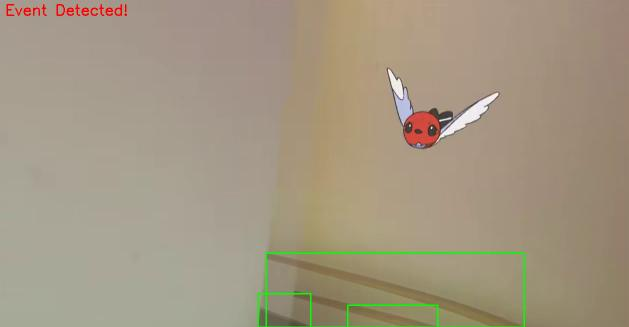

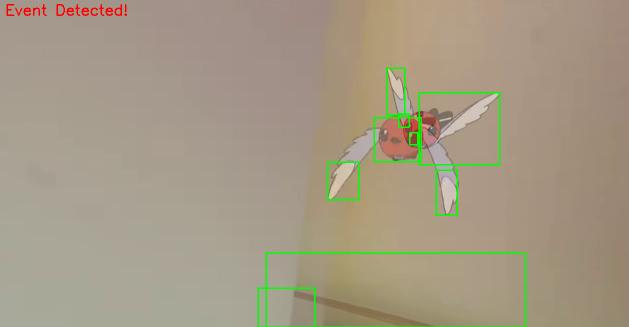

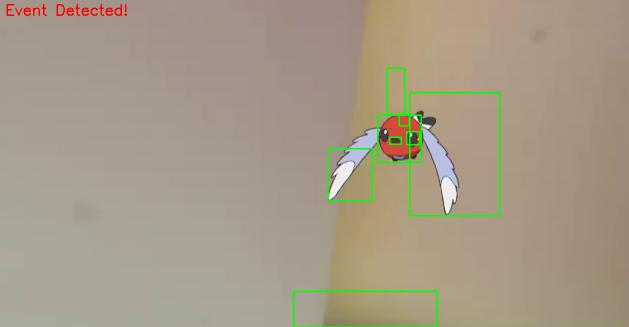

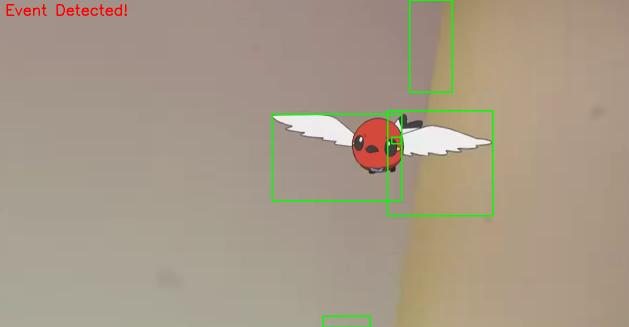

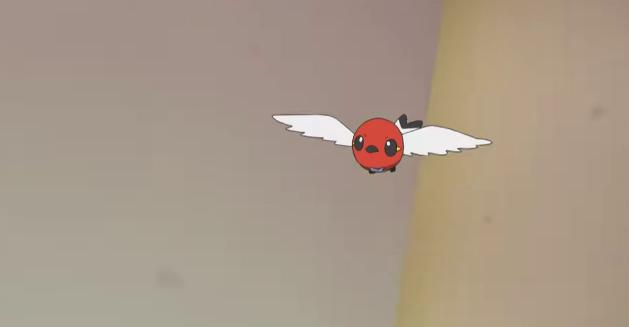

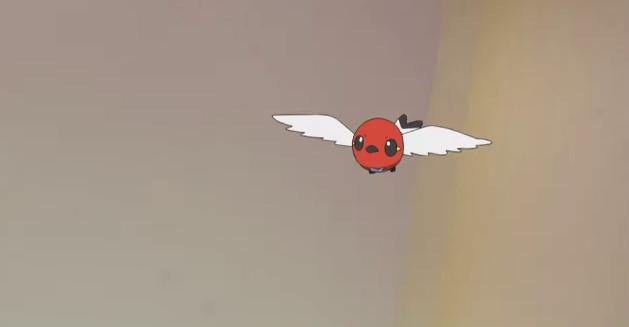

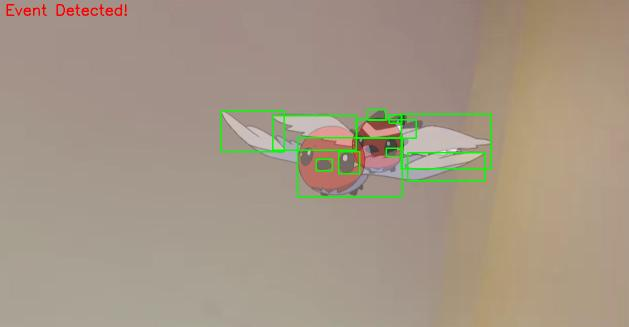

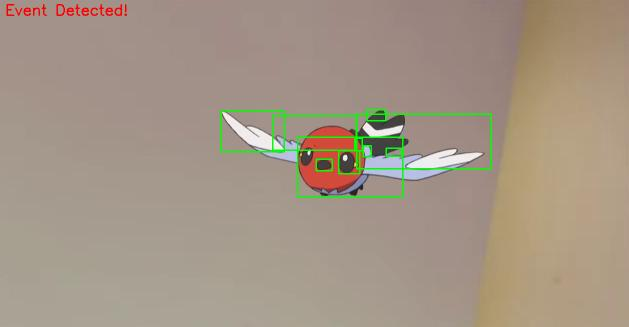

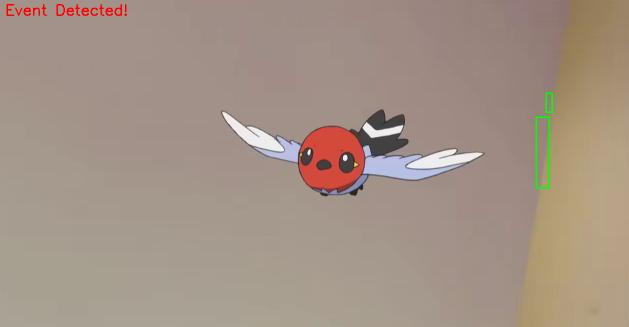

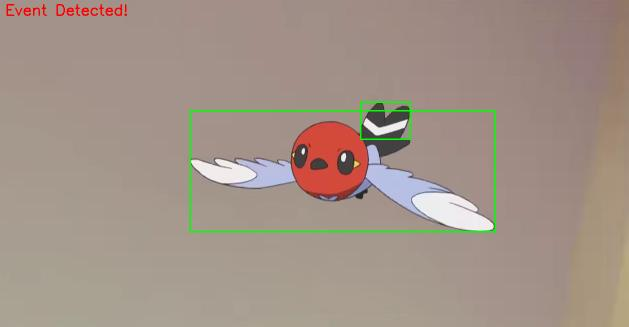

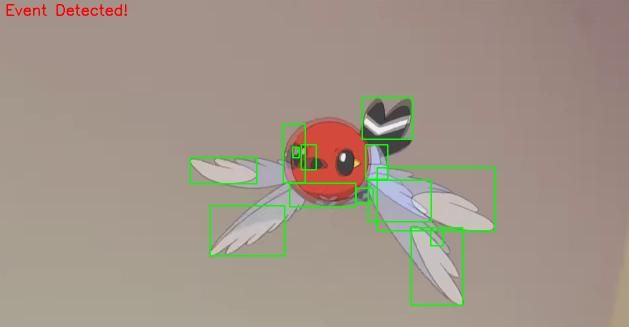

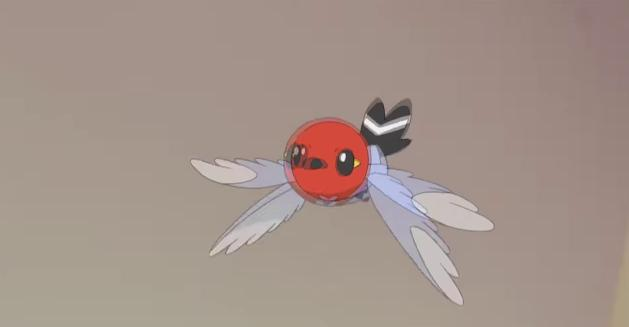

End of video.
Event frames: [5, 8, 12, 15, 17, 18, 19, 20, 21, 23, 24, 26, 28, 29, 30, 31, 33, 35, 36, 37, 39, 40, 41, 42, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 55, 57, 60, 61, 63, 65, 66, 68, 69, 71, 72, 74, 75, 76, 77, 78, 80, 81, 83, 84, 86, 87, 89, 90, 91, 92, 93, 95, 96, 97, 99, 101, 102, 104, 105, 106, 107, 108, 110, 111, 112, 113, 114, 117, 118, 119, 120, 121]


In [11]:
import io
from PIL import Image as PILImage  # Rename PIL Image to avoid conflict
from IPython.display import display, Image  # Import display and Image for Jupyter display
import cv2
import numpy as np

video_path = r"C:\Users\santh\Videos\birb.mp4"
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error opening video file.")
else:
    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    print(f"Video FPS: {fps}, Width: {width}, Height: {height}")

    ret, prev_frame = cap.read()
    if not ret:
        print("End of video.")
        exit()
    prev_frame_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)

    motion_threshold = 50
    event_frames = []

    frame_count = 0
    while True:
        ret, frame = cap.read()
        frame_count += 1

        if not ret:
            print("End of video.")
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frame_diff = cv2.absdiff(gray, prev_frame_gray)
        _, thresh = cv2.threshold(frame_diff, 25, 255, cv2.THRESH_BINARY)

        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        total_motion_intensity = 0

        for contour in contours:
            if cv2.contourArea(contour) > 100:
                (x, y, w, h) = cv2.boundingRect(contour)
                cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
                total_motion_intensity += cv2.contourArea(contour)

        if total_motion_intensity > motion_threshold:
            event_frames.append(frame_count)
            cv2.putText(frame, "Event Detected!", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

        # Resize the frame for display
        scale_percent = 50
        width_resized = int(frame.shape[1] * scale_percent / 100)
        height_resized = int(frame.shape[0] * scale_percent / 100)
        resized_frame = cv2.resize(frame, (width_resized, height_resized), interpolation=cv2.INTER_AREA)

        # Convert the frame to RGB format for PIL
        rgb_frame = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2RGB)
        pil_image = PILImage.fromarray(rgb_frame)

        # Display the frame inline (for Jupyter Notebook)
        with io.BytesIO() as buf:
            pil_image.save(buf, format='JPEG')
            display(Image(data=buf.getvalue()))  # Use display function from IPython.display

        if cv2.waitKey(30) & 0xFF == ord('q'):
            break

        prev_frame_gray = gray

    cap.release()
    cv2.destroyAllWindows()

    print("Event frames:", event_frames)


In [12]:
# Calculate timestamps for each event frame
event_timestamps = [round(frame_num / fps, 2) for frame_num in event_frames]

# Print event frame number and timestamp
for frame_num, timestamp in zip(event_frames, event_timestamps):
    print(f"Event detected at frame {frame_num}, timestamp: {timestamp} seconds")


Event detected at frame 5, timestamp: 0.17 seconds
Event detected at frame 8, timestamp: 0.27 seconds
Event detected at frame 12, timestamp: 0.4 seconds
Event detected at frame 15, timestamp: 0.5 seconds
Event detected at frame 17, timestamp: 0.57 seconds
Event detected at frame 18, timestamp: 0.6 seconds
Event detected at frame 19, timestamp: 0.63 seconds
Event detected at frame 20, timestamp: 0.67 seconds
Event detected at frame 21, timestamp: 0.7 seconds
Event detected at frame 23, timestamp: 0.77 seconds
Event detected at frame 24, timestamp: 0.8 seconds
Event detected at frame 26, timestamp: 0.87 seconds
Event detected at frame 28, timestamp: 0.93 seconds
Event detected at frame 29, timestamp: 0.97 seconds
Event detected at frame 30, timestamp: 1.0 seconds
Event detected at frame 31, timestamp: 1.03 seconds
Event detected at frame 33, timestamp: 1.1 seconds
Event detected at frame 35, timestamp: 1.17 seconds
Event detected at frame 36, timestamp: 1.2 seconds
Event detected at fram